In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('Datasets/velocidad.csv', index_col = 0)
data.head(5)

,t,v
0,0.898853,6.531912
1,1.159800,8.078056
2,1.552927,10.420049
3,1.661786,8.943986
4,1.293464,7.968670


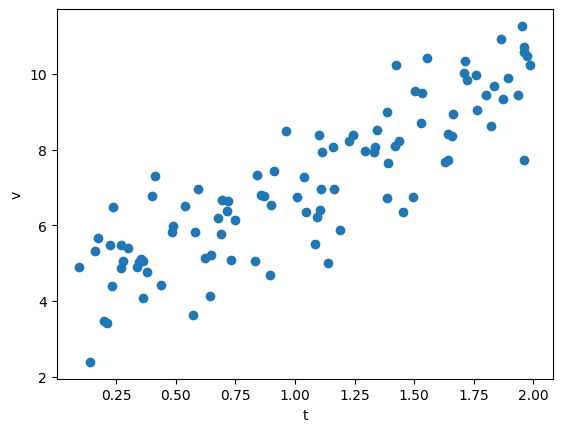

In [3]:
plt.scatter(data['t'],data['v'])
plt.xlabel('t')
plt.ylabel('v')
plt.show()

In [4]:
x = ['t']
x = np.array(data[x])

y = ['v']
y = np.array(data[y])

In [5]:
from sklearn.model_selection import train_test_split
#80% entrenamiento - 20%prueba - se generan cuatro arreglos.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

### Regresión Lineal - Scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
lr.intercept_,lr.coef_

(array([4.13107343]), array([[2.91875076]]))

In [11]:
y_pred = lr.predict(x_test)
y_pred

array([[8.31953355],
       [9.85653031],
       [8.02547472],
       [5.14139467],
       [4.70744679],
       [7.37804976],
       [4.543041  ],
       [9.5744353 ],
       [9.88790728],
       [4.74606633],
       [9.65696218],
       [8.18411755],
       [9.11716195],
       [7.70775211],
       [7.18379069],
       [8.97132575],
       [6.75460157],
       [5.1675328 ],
       [8.37328915],
       [6.6344097 ]])

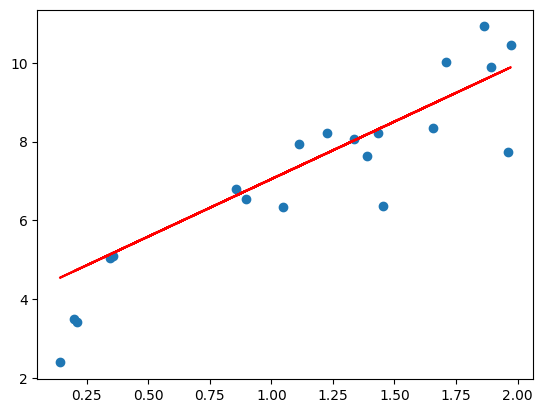

In [12]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.show()

In [13]:
x_new = np.array([[0.0],[2.0]])

In [14]:
y_predict = lr.predict(x_new)

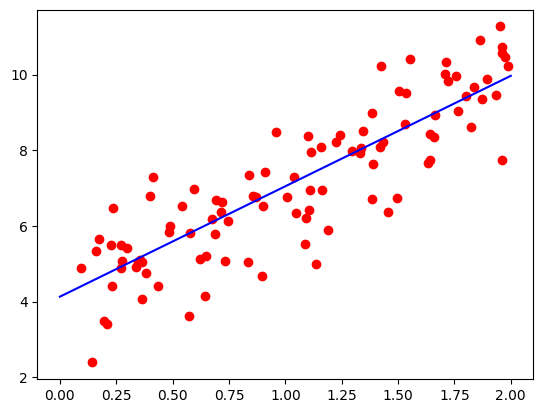

In [15]:
plt.scatter(x,y, color = 'red')
plt.plot(x_new, y_predict, color = 'blue')
plt.show()

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
r2_score(y_test, y_pred)

0.79962064598085

In [18]:
mean_squared_error(y_test,y_pred)

1.0736351127968995

In [19]:
from sklearn.metrics import mean_absolute_percentage_error

In [20]:
mean_absolute_percentage_error(y_test, y_pred)

0.15174900657779042

In [21]:
from Fisica.modelo_lineal import RegresionLineal

In [22]:
lin = RegresionLineal()

In [23]:
lin.fit(x_train,y_train)

## lin.intercept

In [24]:
lin.coef

array([[2.91875076]])

In [25]:
lin.theta

array([[4.13107343],
       [2.91875076]])

In [26]:
y_pred = lin.predict(x_test)

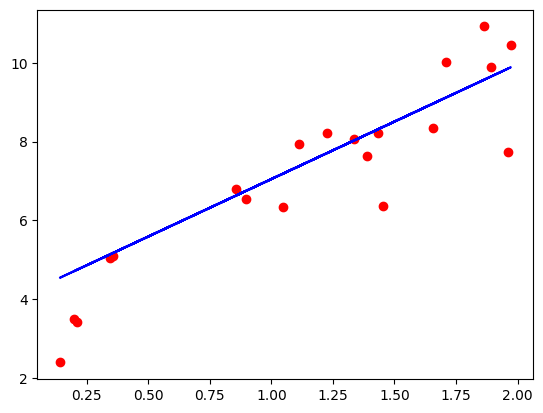

In [27]:
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.show()

In [28]:
r2_score(y_test,y_pred)

0.7996206459808486

### Descenso de Gradiente 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('Datasets/velocidad.csv', index_col = 0)
data.head(2)

,t,v
0,0.898853,6.531912
1,1.159800,8.078056


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = ['t']
x = np.array(data[x])

y = ['v']
y = np.array(data[y])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [34]:
from sklearn.linear_model import SGDRegressor

In [35]:
reg = SGDRegressor(max_iter = 1000, tol = 1e-3, eta0 = 1e-1)

In [36]:
reg.fit(x_train, y_train)

/home/fisica8/anaconda3/envs/David_Luque/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1)

In [37]:
reg.intercept_,reg.coef_

(array([3.90283422]), array([3.11546397]))

In [38]:
y_pred_r  = reg.predict(x_test)

In [39]:
r2_score(y_test,y_pred_r)

0.7075437829531523

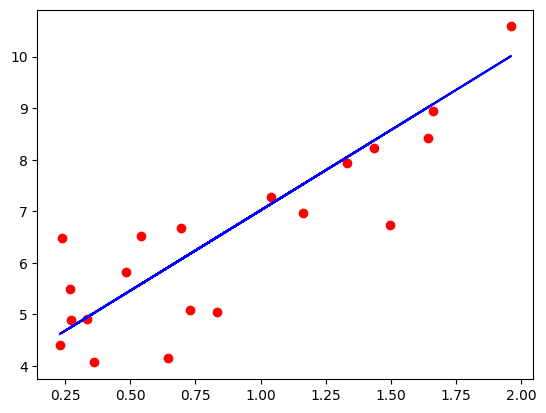

In [40]:
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_test, y_pred_r, color = 'blue')
plt.show()

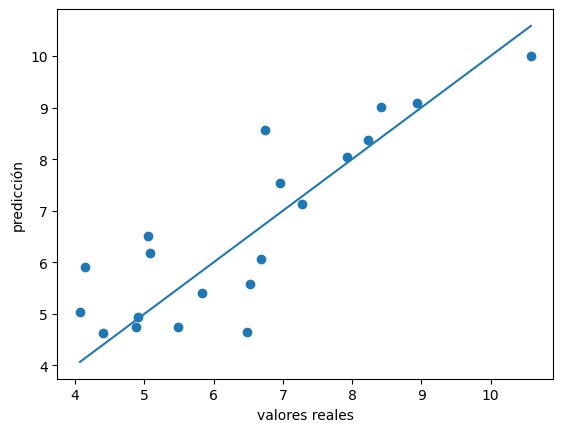

In [41]:
plt.scatter(y_test,y_pred_r)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()])
plt.xlabel('valores reales')
plt.ylabel('predicción')
plt.show()

In [42]:
from Fisica.modelo_lineal import DGRegresion

In [43]:
reg_f = DGRegresion(eta0 = 0.1)

In [44]:
reg_f.fit(x_train, y_train)

In [45]:
reg_f.intercept, reg_f.coef

(array([3.01285932]), array([[3.69374462]]))

In [46]:
reg_fm = DGRegresion(mini_lote = 10, eta0 = 0.1)

In [47]:
reg_fm.fit(x_train, y_train)

In [48]:
reg_fm.intercept, reg_fm.coef

(array([3.56215444]), array([[3.35789332]]))

In [49]:
reg_fe = DGRegresion(semilla = 42, eta0 = 0.1)

In [50]:
reg_fe.fit(x_train,y_train)

In [51]:
reg_fe.intercept,reg_fe.coef

(array([3.28393973]), array([[3.89440321]]))